# Request Roll damping API

In [1]:
%matplotlib.notebook

UsageError: Line magic function `%matplotlib.notebook` not found.


In [19]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

## Simple request

In [10]:
url = r'http://marale.pythonanywhere.com/api/roll_damping'
request = url + r'?lpp=100&beam=10&T=2&BK_L=0&BK_B=0&OG=0&omega0_hat=0.1&C_b=0.7&A_0=0.97&V=10&phi_a=0.1'

r = requests.get(request)
assert r.status_code is 200
result = r.json()

In [11]:
result

{'A_0': 0.97,
 'BK_B': 0.0,
 'BK_L': 0.0,
 'B_e_hat': 0.001010855968957833,
 'C_b': 0.7,
 'OG': 0.0,
 'T': 0.02,
 'V': 1.0,
 'beam': 0.1,
 'method': '/home/marale/REST_API_roll_damping/static/models/polynom_complex.sym',
 'omega0_hat': 0.1,
 'phi_a': 0.1}

In [12]:
result['B_e_hat']

0.001010855968957833

In [13]:
def get_rolldamping(row):

    r = requests.get(url, params=dict(row))

    assert r.status_code is 200
    result = r.json()
    result_ = pd.Series(result, name=row.name)
    return result_

In [48]:
N=10
index = np.arange(0,N)
inputs = pd.DataFrame(index=index)

inputs['lpp']=100
inputs['beam']=10
inputs['T']=2
inputs['BK_L']=0
inputs['BK_B']=0
inputs['OG']=0
inputs['omega0_hat']=0.5
inputs['C_b']=0.8
inputs['A_0']=0.96
inputs['V']=np.linspace(0,10,N)
inputs['phi_a']=np.deg2rad(3)

result = inputs.apply(func=get_rolldamping, axis=1)
result.head()

,A_0,BK_B,BK_L,B_e_hat,C_b,OG,T,V,beam,method,omega0_hat,phi_a
0,0.96,0.0,0.0,0.005706,0.8,0.0,0.02,0.000000,0.1,/home/marale/REST_API_roll_damping/static/mode...,0.5,0.05236
1,0.96,0.0,0.0,0.005286,0.8,0.0,0.02,0.111111,0.1,/home/marale/REST_API_roll_damping/static/mode...,0.5,0.05236
2,0.96,0.0,0.0,0.004964,0.8,0.0,0.02,0.222222,0.1,/home/marale/REST_API_roll_damping/static/mode...,0.5,0.05236
3,0.96,0.0,0.0,0.004740,0.8,0.0,0.02,0.333333,0.1,/home/marale/REST_API_roll_damping/static/mode...,0.5,0.05236
4,0.96,0.0,0.0,0.004615,0.8,0.0,0.02,0.444444,0.1,/home/marale/REST_API_roll_damping/static/mode...,0.5,0.05236


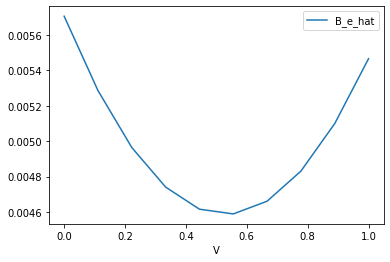

In [49]:
fig,ax=plt.subplots()
result.plot(x='V',y='B_e_hat', ax=ax)


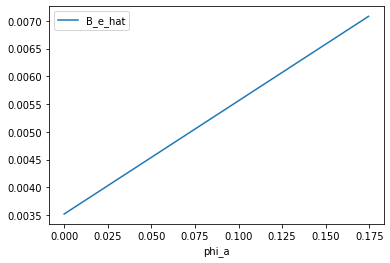

In [39]:
inputs2 = inputs.copy()
inputs2['V']=5
inputs2['phi_a']=np.deg2rad(np.linspace(0,10,N))
result2 = inputs2.apply(func=get_rolldamping, axis=1)

fig,ax=plt.subplots()
result2.plot(x='phi_a',y='B_e_hat', ax=ax)





### Using POST instead
...to request roll damping for many ships in one single request

In [46]:
input_list = [record for record in inputs.to_dict('records')]
response = requests.post(url=url,
                         json=input_list)

outputs = response.json()
outputs
result3 = pd.DataFrame(outputs)

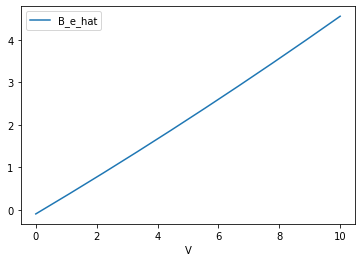

In [47]:
fig,ax=plt.subplots()
result3.plot(x='V',y='B_e_hat', ax=ax)


,A_0,BK_B,BK_L,B_e_hat,C_b,OG,T,V,beam,lpp,omega0_hat,phi_a
0,0.96,0,0,-0.098773,0.8,0,2,0.000000,10,100,0.5,0.05236
1,0.96,0,0,0.379645,0.8,0,2,1.111111,10,100,0.5,0.05236
2,0.96,0,0,0.867903,0.8,0,2,2.222222,10,100,0.5,0.05236
3,0.96,0,0,1.366000,0.8,0,2,3.333333,10,100,0.5,0.05236
4,0.96,0,0,1.873936,0.8,0,2,4.444444,10,100,0.5,0.05236
5,0.96,0,0,2.391711,0.8,0,2,5.555556,10,100,0.5,0.05236
6,0.96,0,0,2.919324,0.8,0,2,6.666667,10,100,0.5,0.05236
7,0.96,0,0,3.456777,0.8,0,2,7.777778,10,100,0.5,0.05236
8,0.96,0,0,4.004069,0.8,0,2,8.888889,10,100,0.5,0.05236
9,0.96,0,0,4.561200,0.8,0,2,10.000000,10,100,0.5,0.05236
